In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter("ignore")

In [5]:
# 利用svm进行垃圾邮件识别
data1 = pd.read_csv('data/svmdata1.csv')
data1.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


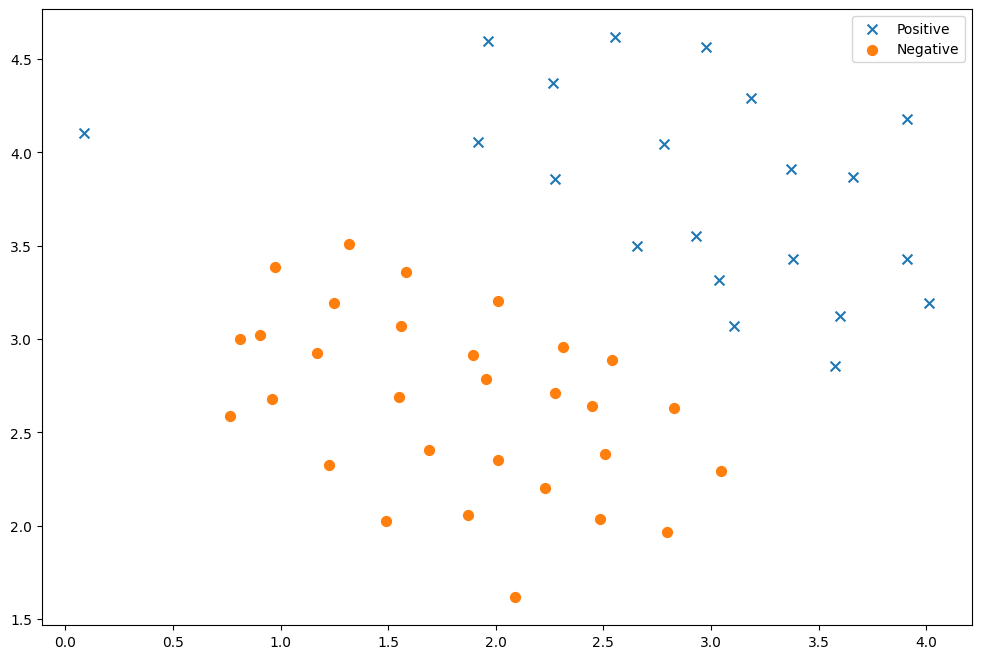

In [6]:
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

In [7]:
# 直接用sklearn进行模型训练
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)  # c-惩罚参数  使用合页损失函数
svc

LinearSVC(C=1, loss='hinge')

In [8]:
svc.fit(data1[['X1', 'X2']], data1['y'])
svc.score(data1[['X1', 'X2']], data1['y'])

0.9803921568627451

In [11]:
# 将惩罚参数增大
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data1[['X1', 'X2']], data1['y'])
svc2.score(data1[['X1', 'X2']], data1['y'])

0.9411764705882353

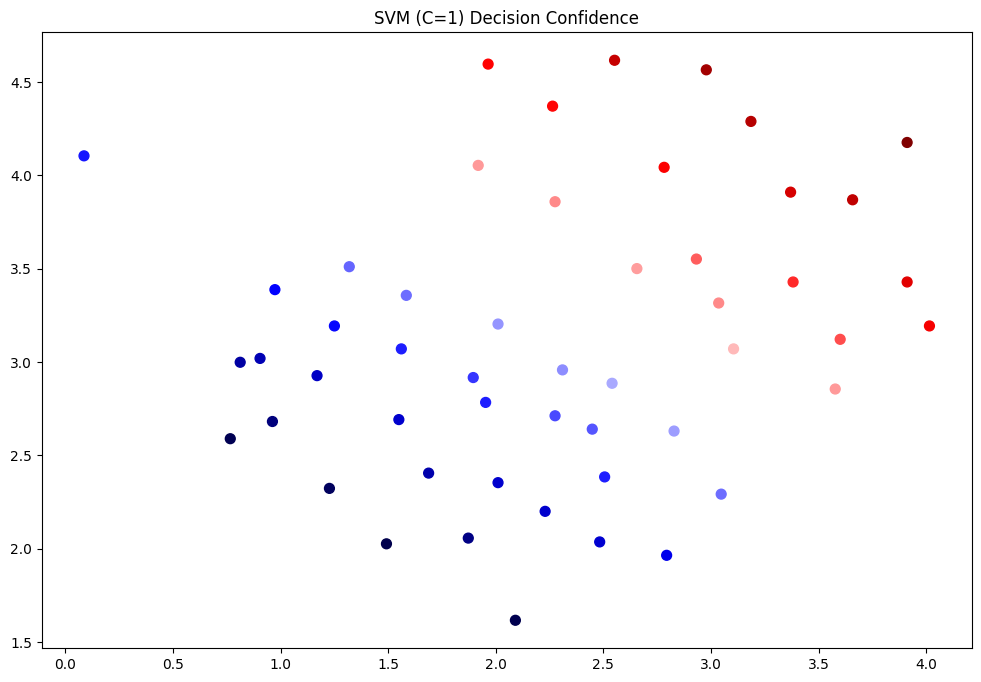

In [13]:
# 查看置信区间
data1['SVM 1 Confidence'] = svc.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data1['X1'],
           data1['X2'],
           s=50,
           c=data1['SVM 1 Confidence'],
           cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

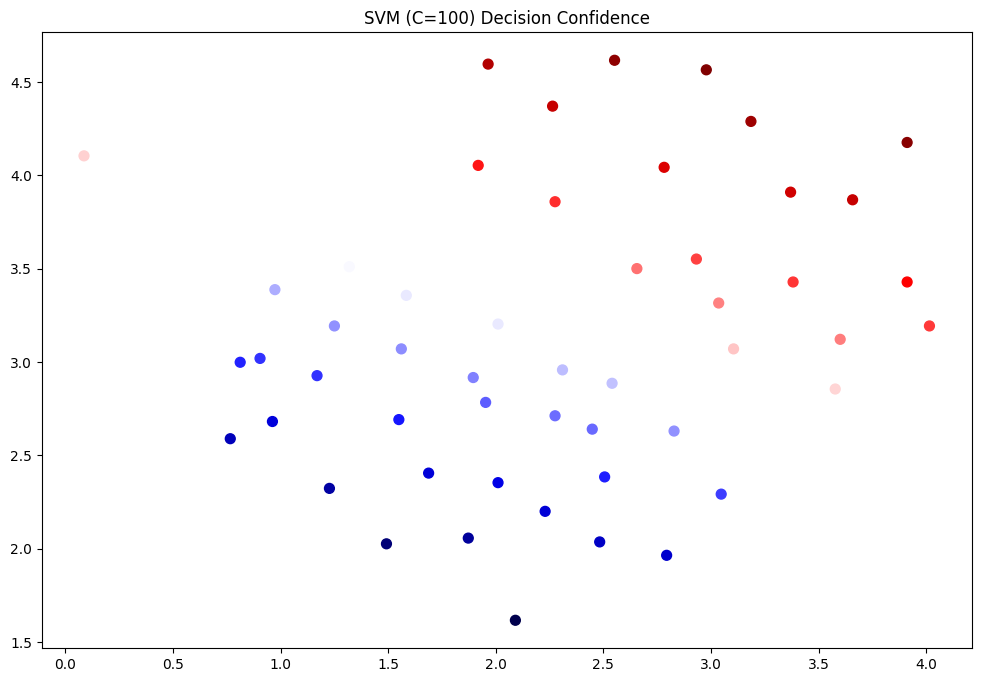

In [16]:
data1['SVM 2 Confidence'] = svc2.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data1['X1'], data1['X2'], s=50, c=data1['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show() 

In [17]:
# 将线性svm转变为非线性svm  -- 引入高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2)**2) / (2 * (sigma**2))))
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [19]:
data2 = pd.read_csv('data/svmdata2.csv')
data2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


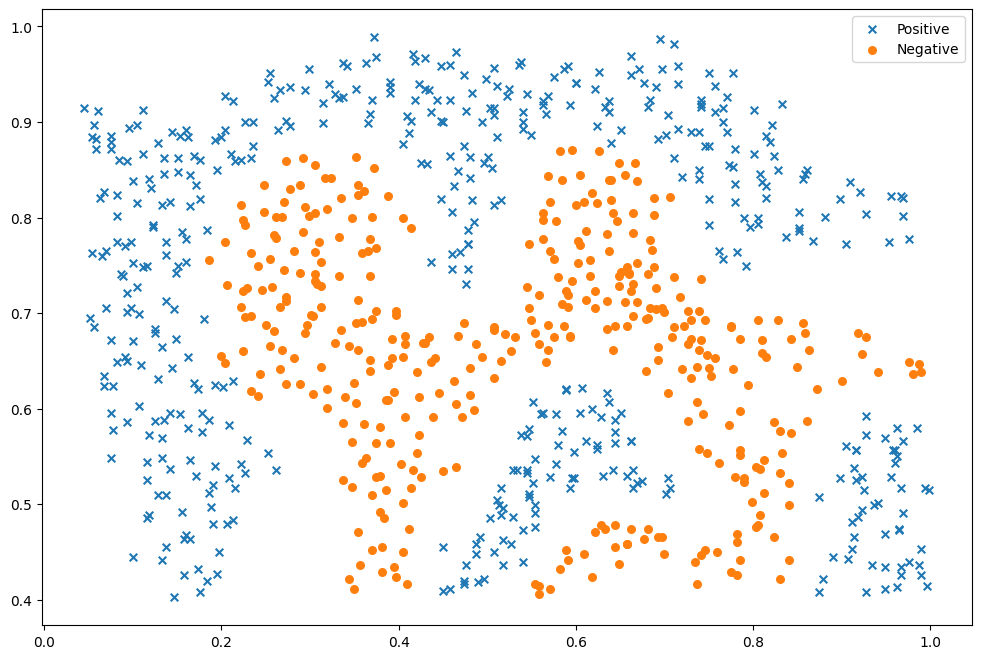

In [20]:
positive = data2[data2['y'].isin([1])]
negative = data2[data2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

In [21]:
# 使用非线性svm处理
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [24]:
svc.fit(data2[['X1', 'X2']], data2['y'])
svc.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

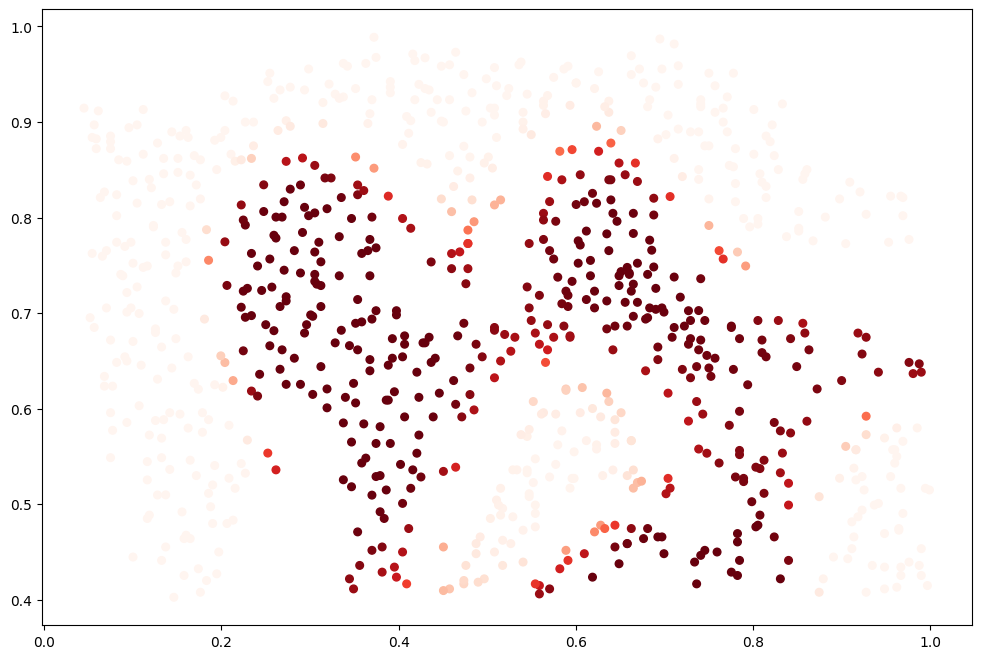

In [25]:
data2['Probability'] = svc.predict_proba(data2[['X1', 'X2']])[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data2['X1'], data2['X2'], s=30, c=data2['Probability'], cmap='Reds')
plt.show()  # 展示边界

In [26]:
# 网格搜索 寻找svm的最优超参数
data3=pd.read_csv('data/svmdata3.csv')
data3val=pd.read_csv('data/svmdata3val.csv')

In [27]:
X = data3[['X1','X2']]
Xval = data3val[['X1','X2']]
y = data3['y'].ravel()
yval = data3val['yval'].ravel()

In [28]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}
for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

In [29]:
# 大分类间隔器
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] 
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [30]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [31]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

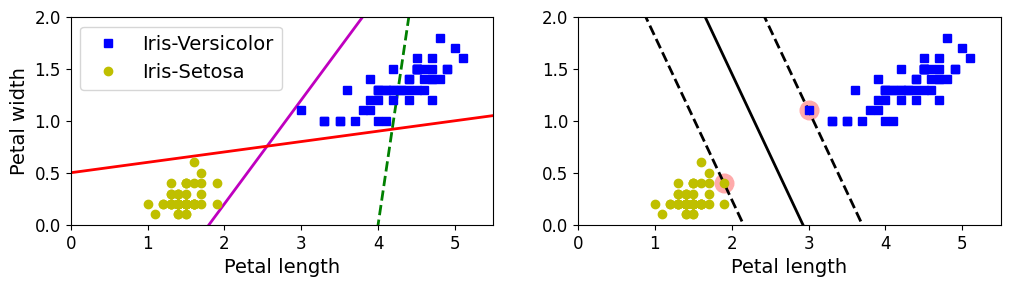

In [32]:
plt.figure(figsize=(12, 2.7))
plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [37]:
# 手动定义svm
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split

def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    return data[:,:2], data[:,-1]

In [38]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

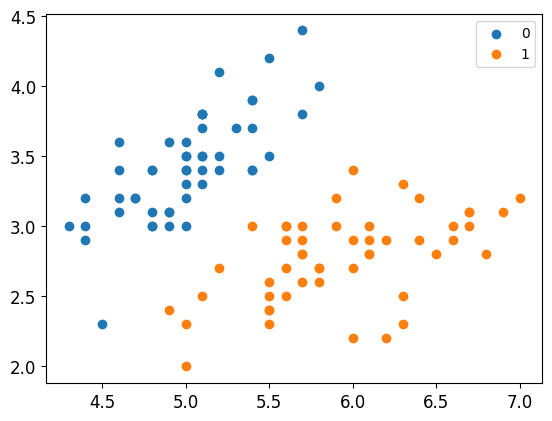

In [39]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [49]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        self.C = 1.0

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1
        
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r
    # 设置核函数
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2

        return 0
    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue

            E1 = self.E[i]
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in range(self.max_iter):
            i1, i2 = self._init_alpha()
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])

            E1 = self.E[i1]
            E2 = self.E[i2]
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(
                self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                continue

            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (E1 - E2) / eta 
            alpha2_new = self._compare(alpha2_new_unc, L, H)
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)
            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b
            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                b_new = (b1_new + b2_new) / 2
            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])

        return 1 if r > 0 else -1
    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)
    def _weight(self):
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [50]:
svm = SVM(max_iter=100)
svm.fit(X_train, y_train)

'train done!'

In [51]:
svm.score(X_test, y_test)

0.52